In [1]:
import pandas as pd
import numpy as np
from joblib import dump, load

import os
from functools import reduce

import warnings
warnings.filterwarnings("ignore")

In [35]:
"""
notebook: 1.1-simmler-data-preprocessing_accidents_severity
---------------------------------------------------------------------
merge accident dataframe with target variable to explore relationship between accident characteristics and target
"""

'\nnotebook: 1.1-simmler-data-preprocessing_accidents_severity\n---------------------------------------------------------------------\nmerge accident dataframe with target variable to explore relationship between accident characteristics and target\n'

In [3]:
#------------------------------------------------------------------------------------------------
# Import joblib file with 2019-2024 preprocessed data for accidents
#------------------------------------------------------------------------------------------------
df_acc = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents.joblib')

display(df_acc.head(3))
#df_acc['acc_department'].unique()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0
1,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0
2,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0


In [4]:
#------------------------------------------------------------------------------------------------
# load passenger raw data
# todo: get data from dump
#------------------------------------------------------------------------------------------------

def merge_severity(df_acc):
    
    acc_ind_years=[]
    acc_ind=pd.DataFrame()
    
    for year in range(2019, 2025):
        
        acc_year = df_acc[df_acc['acc_year'] == year]
        
        #todo: load passenger raw data from dump
        ind_year_name = f"_local/_data/usagers-{year}.csv"
        ind_year = pd.read_csv(ind_year_name, sep = ';', low_memory = False)
        ind_year_filtered = ind_year[['Num_Acc','num_veh','grav']]
        
        #merge passenger severity with accident data
        acc_ind_year = pd.merge(acc_year, ind_year_filtered, left_on='acc_num', right_on='Num_Acc', how='inner')
        acc_ind_year.drop('Num_Acc', axis=1, inplace=True)
        acc_ind_years.append(acc_ind_year)
        
        #concatenate
        acc_ind = pd.concat([acc_ind, acc_ind_year], axis=0)
    
    return acc_ind, acc_ind_years
    
df_acc_grav, df_acc_grav_years = merge_severity(df_acc)
df_acc_grav.head()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,num_veh,grav
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,4
1,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,4
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,4
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1


In [5]:
#------------------------------------------------------------------------------------------------
# rename columns
# todo: get correct name
#------------------------------------------------------------------------------------------------

df_acc_grav.rename(columns={'num_veh': 'ind_num_veh'}, inplace=True)
df_acc_grav.rename(columns={'grav': 'ind_severity'}, inplace=True)

df_acc_grav.info()
df_acc_grav.head()


<class 'pandas.core.frame.DataFrame'>
Index: 745158 entries, 0 to 125186
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 745158 non-null  int64         
 1   acc_date                745158 non-null  datetime64[ns]
 2   acc_year                745158 non-null  int64         
 3   acc_month               745158 non-null  int64         
 4   acc_hour                745158 non-null  int64         
 5   acc_department          745158 non-null  object        
 6   acc_municipality        745158 non-null  object        
 7   acc_metro               745158 non-null  int64         
 8   acc_long                745158 non-null  float64       
 9   acc_lat                 745158 non-null  float64       
 10  acc_ambient_lightning   745145 non-null  float64       
 11  acc_atmosphere          745117 non-null  float64       
 12  acc_urbanization_level  745158 non-

,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,4
1,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,4
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,4
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1


In [6]:
# --------------------------------------------------------------------------------------------------------------------------------
# remove duplicates
# --------------------------------------------------------------------------------------------------------------------------------

print("duplicates:", df_acc_grav.duplicated().sum())

df_acc_grav.drop_duplicates(inplace=True)
print("duplicates AFTER cleaning:", df_acc_grav.duplicated().sum())


duplicates: 91190
duplicates AFTER cleaning: 0


In [7]:
# --------------------------------------------------------------------------------------------------------------------------------
# missing values report
# --------------------------------------------------------------------------------------------------------------------------------
missing_counts = df_acc_grav.isna().sum()
missing_percent = df_acc_grav.isna().sum() / len(df_acc_grav)

missing_summary_acc_grav = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(4)
})
print(missing_summary_acc_grav)
print()

# --------------------------------------------------------------------------------------------------------------------------------
# check for nan / -1 values in target
# --------------------------------------------------------------------------------------------------------------------------------

undefined_grav_count_1 = df_acc_grav['ind_severity'].isna().sum()
print('number of rows with nan target variable:')
print(undefined_grav_count_1)

undefined_grav_count_2 = len(df_acc_grav[df_acc_grav['ind_severity'] == -1])
print('number of rows with -1 target variable:')
print(undefined_grav_count_2)

# --------------------------------------------------------------------------------------------------------------------------------
# remove rows with -1 target
# --------------------------------------------------------------------------------------------------------------------------------

indices_to_drop = df_acc_grav[df_acc_grav['ind_severity'] == -1].index
df_acc_grav = df_acc_grav.drop(indices_to_drop)

# --------------------------------------------------------------------------------------------------------------------------------
# recheck for -1 values in target
# --------------------------------------------------------------------------------------------------------------------------------

undefined_grav_count_2 = len(df_acc_grav[df_acc_grav['ind_severity'] == -1])
print('number of rows with -1 target variable:')
print(undefined_grav_count_2)


                        Missing Count  Missing %
acc_num                             0     0.0000
acc_date                            0     0.0000
acc_year                            0     0.0000
acc_month                           0     0.0000
acc_hour                            0     0.0000
acc_department                      0     0.0000
acc_municipality                    0     0.0000
acc_metro                           0     0.0000
acc_long                            0     0.0000
acc_lat                             0     0.0000
acc_ambient_lightning              12     0.0000
acc_atmosphere                     39     0.0001
acc_urbanization_level              0     0.0000
acc_intersection                   27     0.0000
acc_collision_type               3469     0.0053
ind_num_veh                         0     0.0000
ind_severity                        0     0.0000

number of rows with nan target variable:
0
number of rows with -1 target variable:
418
number of rows with -1 target 

In [8]:
# -------------------------------------------------------------------------------------------------
# export accident dataframe with target variable via joblib
# -------------------------------------------------------------------------------------------------
dump(df_acc_grav, (r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity.joblib'))


['..\\..\\data\\processed\\2_preprocessing\\1.1-simmler-data-preprocessing_accidents_severity.joblib']

In [9]:
# -------------------------------------------------------------------------------------------------
# copy file
# -------------------------------------------------------------------------------------------------

df_acc_target = df_acc_grav.copy()
df_acc_target.head()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,4
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,4
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1
5,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,4


In [10]:
# -------------------------------------------------------------------------------------------------
# function: reorder target variable
# -------------------------------------------------------------------------------------------------

reordered = False
def reorder_grav():
    if not reordered:
        char_grav_2024['ind_severity'].replace({2: 4, 4: 2}, inplace=True)
        reordered = True

dict_reordered = {}
def reorder_grav_df(df, df_name):
    
    if not df_name in dict_reordered:
        dict_reordered[df_name] = False
    
    reordered = dict_reordered[df_name]
    print(reordered)
    
    if not reordered:
        df['ind_severity'].replace({2: 4, 4: 2}, inplace=True)
        print('reordered')
        dict_reordered[df_name] = True


In [11]:
# -------------------------------------------------------------------------------------------------
# apply reordering
# -------------------------------------------------------------------------------------------------

display(dict_reordered)
display(df_acc_target.ind_severity.unique())

#apply reordering
reorder_grav_df(df_acc_target, "df_acc_target")

display(dict_reordered)
display(df_acc_target.ind_severity.unique())


{}

array([4, 1, 3, 2])

False
reordered


{'df_acc_target': True}

array([2, 1, 3, 4])

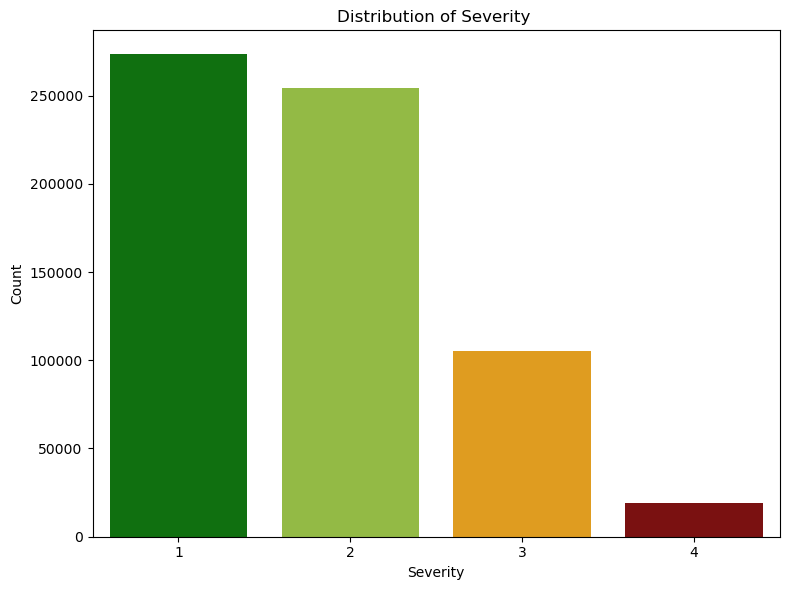

In [13]:
# -------------------------------------------------------------------------------------------------
# visualization of reordered target variable
# -------------------------------------------------------------------------------------------------

plot_color = 'deepskyblue'
colors_grav_org_order = {1: 'green', 2: 'darkred', 3: 'orange', 4: 'yellowgreen'}
colors_grav_reorder = {1: 'green', 2: 'yellowgreen', 3: 'orange', 4: 'darkred'}

import importlib
import lib_1_0_simmler_data_preprocessing_graph_2 as lib_graph_2

importlib.reload(lib_graph_2)

#lib_graph_2.sns_countplot(df_acc_target, 'ind_severity', column_title='Severity', title='Distribution of Severity', palette_color=colors_grav_reorder)


In [14]:
# -------------------------------------------------------------------------------------------------
# export accident dataframe with reordered target variable via joblib
# -------------------------------------------------------------------------------------------------
dump(df_acc_target, (r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity_reordered.joblib'))


['..\\..\\data\\processed\\2_preprocessing\\1.1-simmler-data-preprocessing_accidents_severity_reordered.joblib']